In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y = dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

confusion_matrix :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

accuracy_score : 1.0


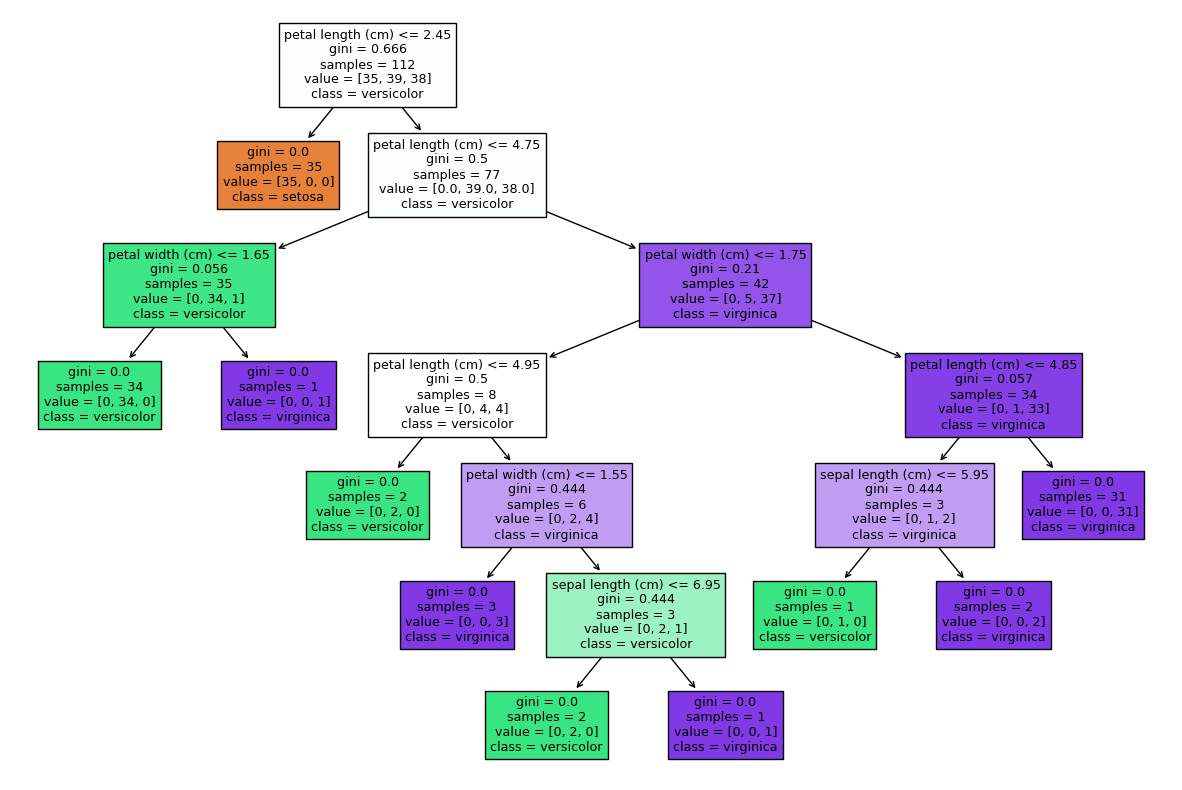

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
print("accuracy_score :", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()

### Post pruning

confusion_matrix :
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

accuracy_score : 0.9736842105263158


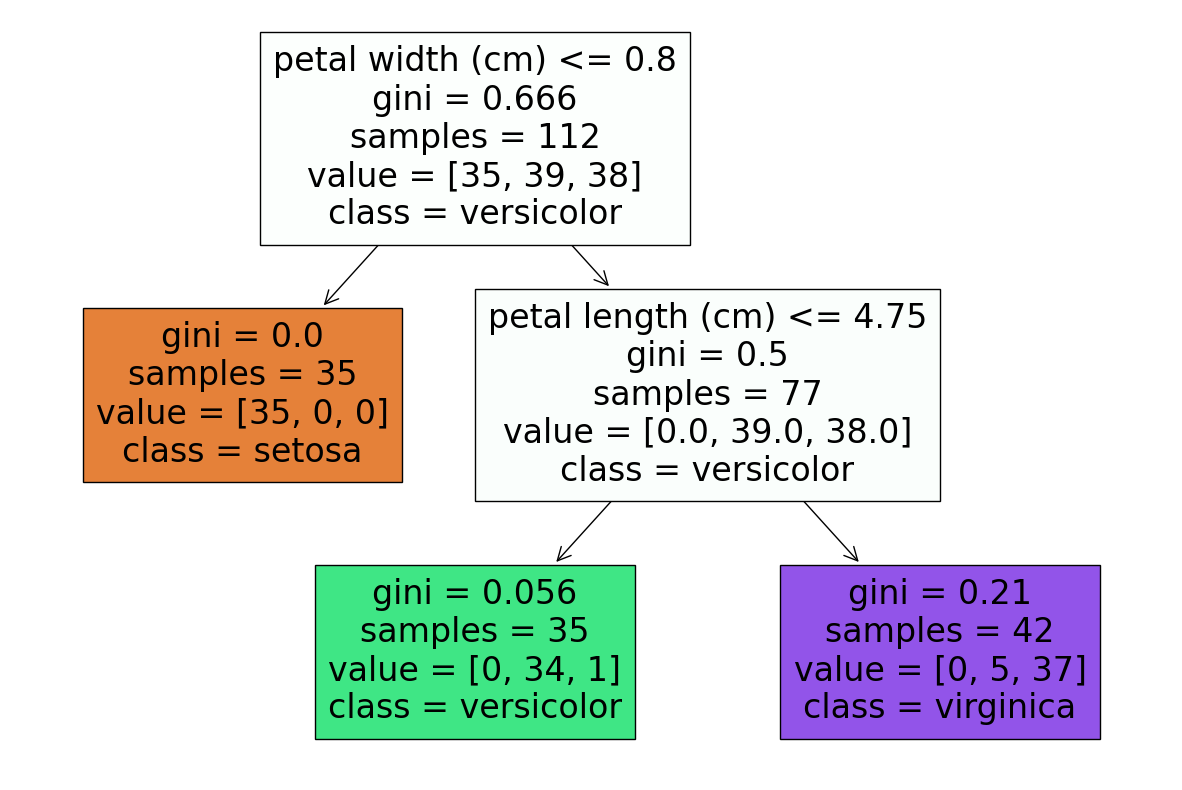

In [18]:
model = DecisionTreeClassifier(max_depth=2) # deciding max_depth=2 after observing the whole decision tree
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
print("accuracy_score :", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()

## Hyperparameter Tuning

In [8]:
params = {

    "criterion" :["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth" : [ 1,2,3,4,5,6],
    "max_features" : ["sqrt", "log2"]

}

In [9]:
params

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 6],
 'max_features': ['sqrt', 'log2']}

In [14]:
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid=params, scoring="accuracy",cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("best parameters :", grid.best_params_)
print("best score :", grid.best_score_)

print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
print("accuracy_score :", accuracy_score(y_test, y_pred))

best parameters : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
best score : 0.9549407114624506
confusion_matrix :
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

accuracy_score : 0.9736842105263158


### Re-training model with best hyperparameters Pre-Pruning

confusion_matrix :
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

accuracy_score : 0.9736842105263158


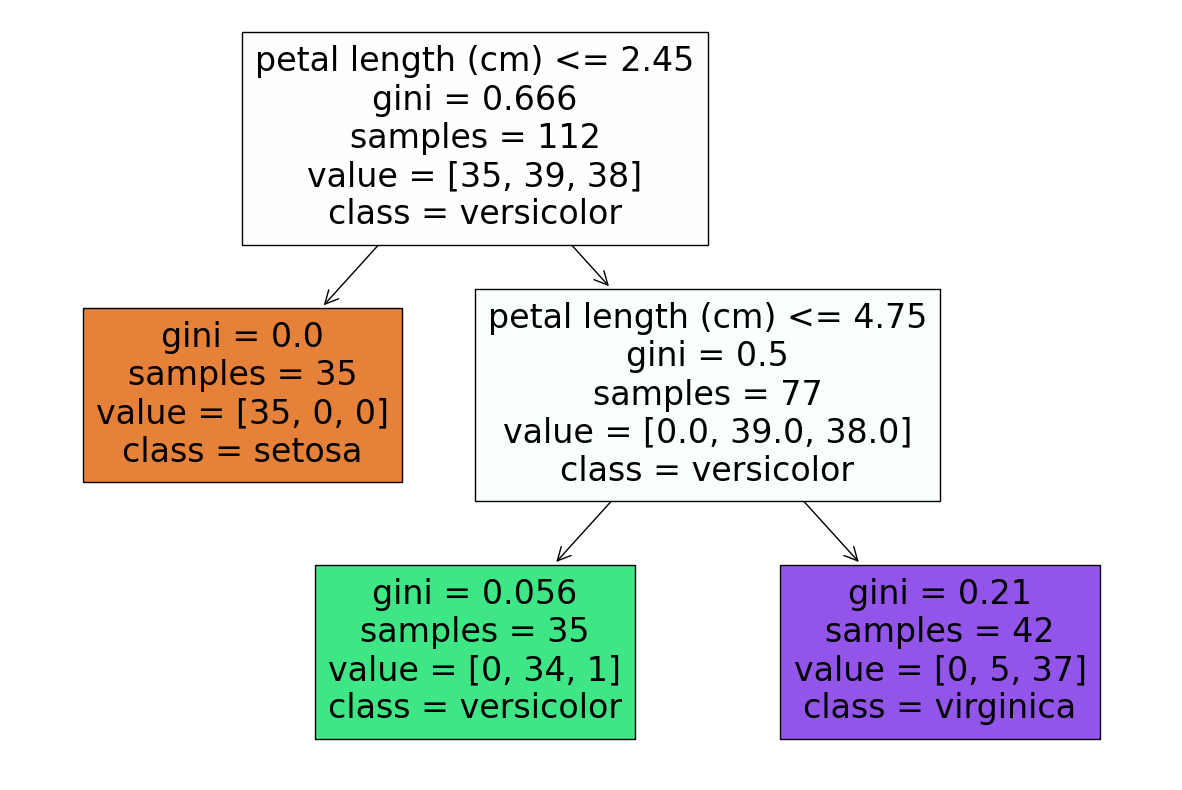

In [17]:
model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, max_features='log2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("confusion_matrix :\n", confusion_matrix(y_test, y_pred))
print("classification_report :\n", classification_report(y_test, y_pred))
print("accuracy_score :", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()